## **FINANCE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
file_path = '/content/goldstock.csv'
goldstock_df = pd.read_csv(file_path)

goldstock_df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [ ]:
goldstock_df = goldstock_df.drop('Date', axis=1)
goldstock_df.head()

,Unnamed: 0,Close,Volume,Open,High,Low
0,0,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2051.6,250946.0,2033.2,2067.3,2033.1


In [ ]:
X = goldstock_df.drop('Close', axis=1)
y = goldstock_df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Linear Regression**

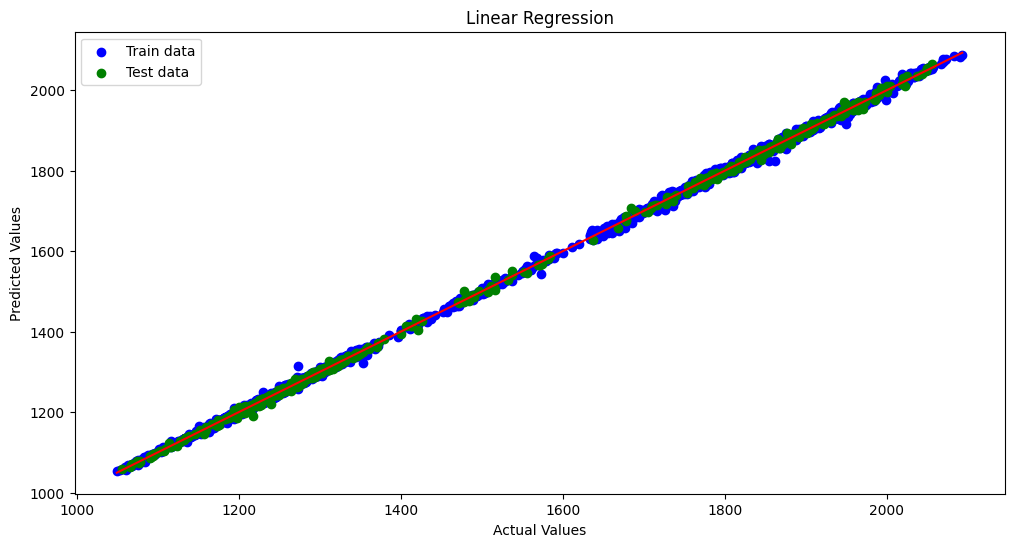

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

import matplotlib.pyplot as plt

# Predictions
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

# Plotting train data
plt.figure(figsize=(12, 6))
plt.scatter(y_train, train_pred, color='blue', label='Train data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')

# Plotting test data
plt.scatter(y_test, test_pred, color='green', label='Test data')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### **Polynomial Regression**

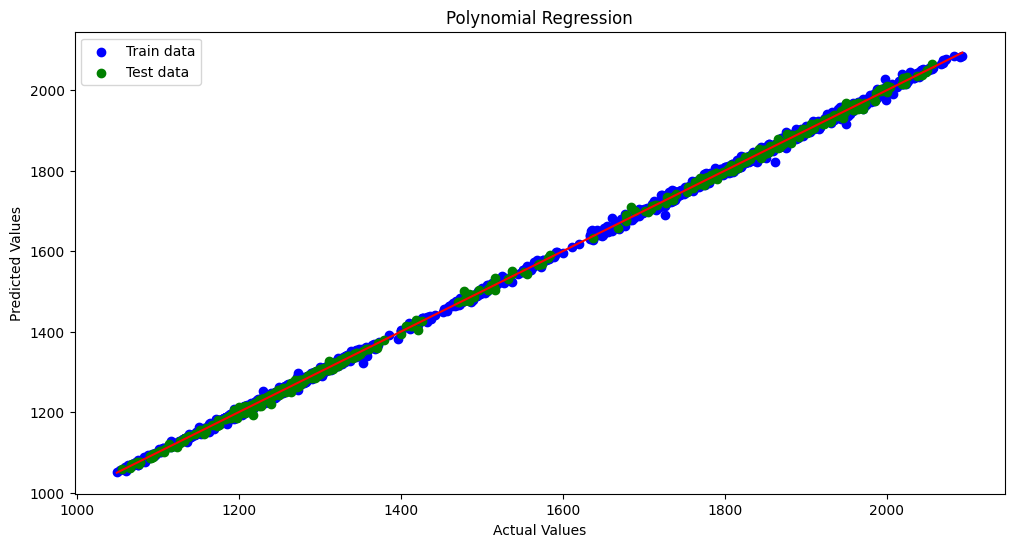

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predictions
train_pred_poly = lr_poly.predict(X_train_poly)
test_pred_poly = lr_poly.predict(X_test_poly)

# Plotting train data
plt.figure(figsize=(12, 6))
plt.scatter(y_train, train_pred_poly, color='blue', label='Train data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')

# Plotting test data
plt.scatter(y_test, test_pred_poly, color='green', label='Test data')
plt.legend()
plt.title('Polynomial Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### **Lasso Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.286e+04, tolerance: 1.793e+04
  model = cd_fast.enet_coordinate_descent(


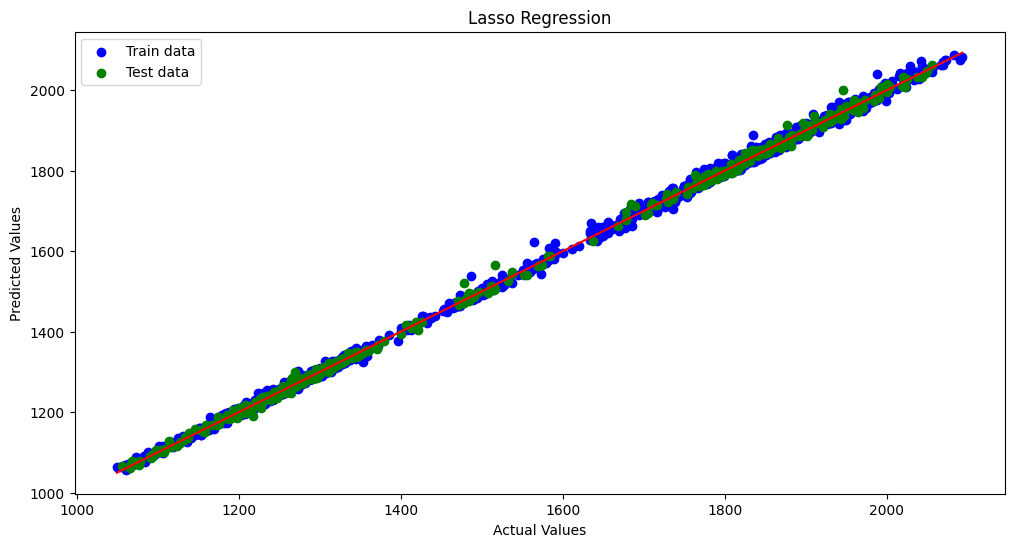

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)

# Predictions for Lasso
train_pred_lasso = lasso.predict(X_train)
test_pred_lasso = lasso.predict(X_test)

# Plotting train data for Lasso
plt.figure(figsize=(12, 6))
plt.scatter(y_train, train_pred_lasso, color='blue', label='Train data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')

# Plotting test data for Lasso
plt.scatter(y_test, test_pred_lasso, color='green', label='Test data')
plt.legend()
plt.title('Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### **Ridge Regression**

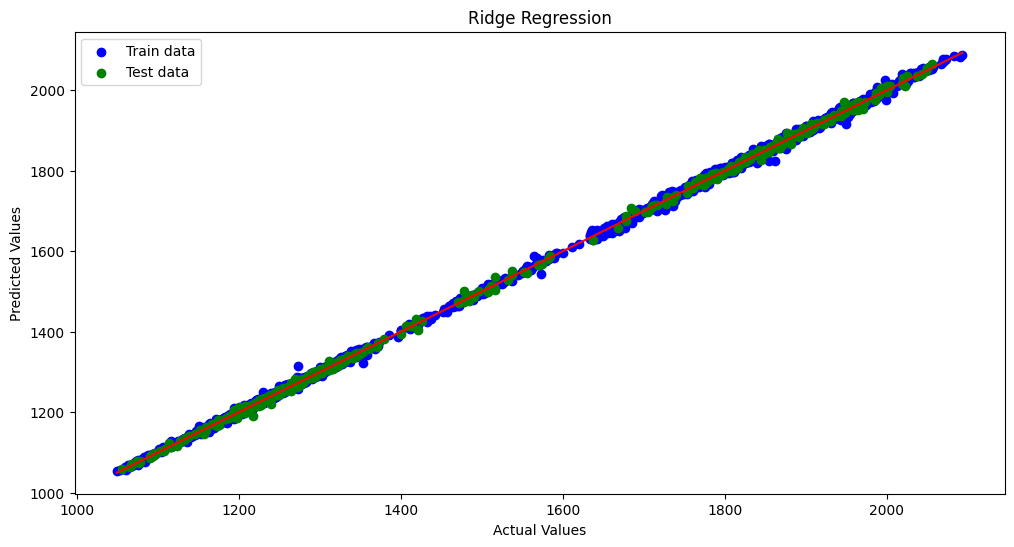

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

# Predictions for Ridge
train_pred_ridge = ridge.predict(X_train)
test_pred_ridge = ridge.predict(X_test)

# Plotting train data for Ridge
plt.figure(figsize=(12, 6))
plt.scatter(y_train, train_pred_ridge, color='blue', label='Train data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')

# Plotting test data for Ridge
plt.scatter(y_test, test_pred_ridge, color='green', label='Test data')
plt.legend()
plt.title('Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### **Random Forest**

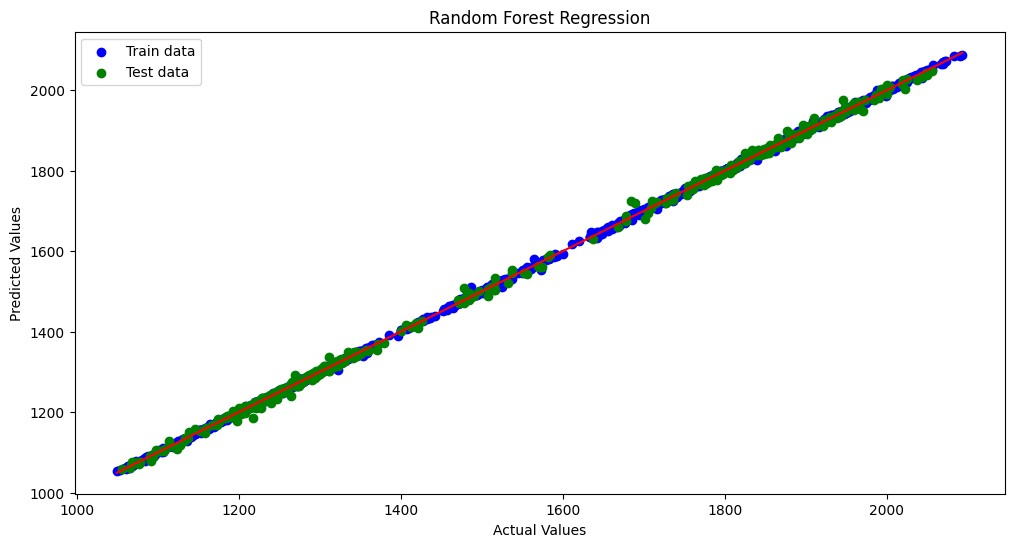

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
train_pred_rf = rf.predict(X_train)
test_pred_rf = rf.predict(X_test)

# Plotting train data
plt.figure(figsize=(12, 6))
plt.scatter(y_train, train_pred_rf, color='blue', label='Train data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')

# Plotting test data
plt.scatter(y_test, test_pred_rf, color='green', label='Test data')
plt.legend()
plt.title('Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### **Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, train_pred)
    mse_test = mean_squared_error(y_test, test_pred)

    rmse_train = sqrt(mse_train)
    rmse_test = sqrt(mse_test)

    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)

    print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
    print(f"Train RMSE: {rmse_train}, Test RMSE: {rmse_test}")
    print(f"Train R2 Score: {r2_train}, Test R2 Score: {r2_test}")

# Evaluate Linear Regression
print("Linear Regression:")
evaluate_model(lr, X_train, X_test, y_train, y_test)

# Evaluate Polynomial Regression
print("\nPolynomial Regression:")
evaluate_model(lr_poly, X_train_poly, X_test_poly, y_train, y_test)

# Evaluate Lasso Regression
print("\nLasso Regression:")
evaluate_model(lasso, X_train, X_test, y_train, y_test)

# Evaluate Ridge Regression
print("\nRidge Regression:")
evaluate_model(ridge, X_train, X_test, y_train, y_test)

# Evaluate Random Forest Regression
print("\nRandom Forest Regression:")
evaluate_model(rf, X_train, X_test, y_train, y_test)

Linear Regression:
Train MSE: 32.69986702777118, Test MSE: 32.58181689128176
Train RMSE: 5.7183797554701785, Test RMSE: 5.708048431056079
Train R2 Score: 0.9996338306816932, Test R2 Score: 0.9996331511257912

Polynomial Regression:
Train MSE: 29.97623829444238, Test MSE: 31.540186101413127
Train RMSE: 5.475056008338397, Test RMSE: 5.616065001530265
Train R2 Score: 0.999664329560351, Test R2 Score: 0.9996448791728759

Lasso Regression:
Train MSE: 62.060978369623236, Test MSE: 70.14063497818124
Train RMSE: 7.877879052741495, Test RMSE: 8.375000595712292
Train R2 Score: 0.9993050483623143, Test R2 Score: 0.9992102646373622

Ridge Regression:
Train MSE: 32.69986703265096, Test MSE: 32.5818672525074
Train RMSE: 5.718379755896853, Test RMSE: 5.708052842476794
Train R2 Score: 0.9996338306816386, Test R2 Score: 0.9996331505587585

Random Forest Regression:
Train MSE: 7.560258493526137, Test MSE: 54.84931241948291
Train RMSE: 2.7495924231649567, Test RMSE: 7.406032164356492
Train R2 Score: 0.99

### **Comparison**

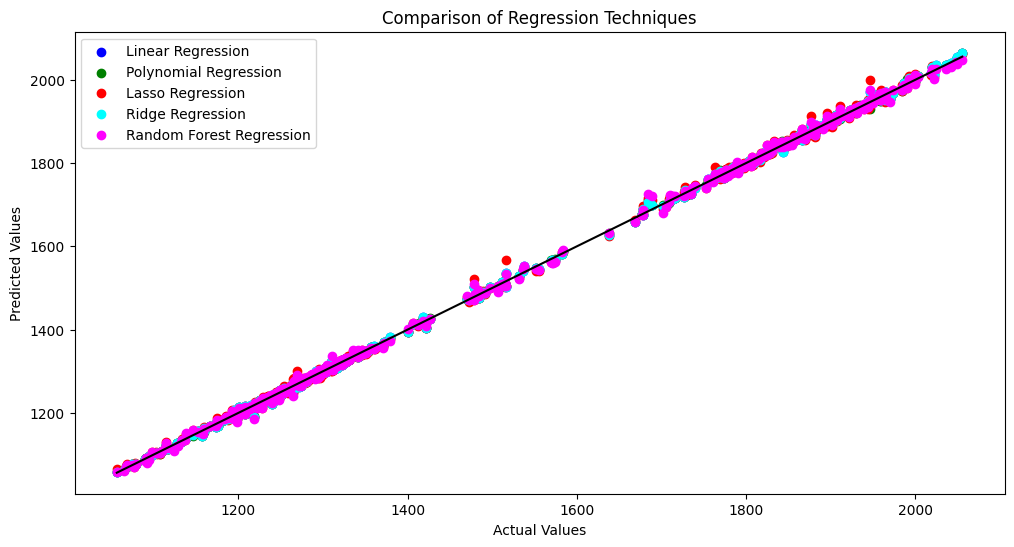

In [ ]:
# Predictions
test_pred_lr = lr.predict(X_test)
test_pred_poly = lr_poly.predict(X_test_poly)
test_pred_lasso = lasso.predict(X_test)
test_pred_ridge = ridge.predict(X_test)
test_pred_rf = rf.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

plt.scatter(y_test, test_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, test_pred_poly, color='green', label='Polynomial Regression')
plt.scatter(y_test, test_pred_lasso, color='red', label='Lasso Regression')
plt.scatter(y_test, test_pred_ridge, color='cyan', label='Ridge Regression')
plt.scatter(y_test, test_pred_rf, color='magenta', label='Random Forest Regression')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black')
plt.legend()
plt.title('Comparison of Regression Techniques')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## **WEATHER**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
file_path = '/content/weather.csv'
weather_df = pd.read_csv(file_path)

weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [ ]:
## Data pre processing
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
# Check for missing values
print(weather_df.isnull().sum())

# Handle missing values (if needed)
weather_df = weather_df.dropna()

# Dropping categorical columns
weather_df = weather_df.drop(columns=categorical_columns)

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [ ]:
weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0


In [ ]:
# Assuming your dataset has features X and target variable y
X = weather_df.drop(columns=['Rainfall'])  # Adjust 'target_column_name' to the name of your target variable
y = weather_df['Rainfall']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Linear Regression**



In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
print("Linear Regression RMSE:", linear_rmse)

Linear Regression RMSE: 5.557455049497085


### **Polynomial Regression**


In [ ]:
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_predictions = poly_model.predict(X_test_poly)
poly_rmse = mean_squared_error(y_test, poly_predictions, squared=False)
print("Polynomial Regression RMSE:", poly_rmse)

Polynomial Regression RMSE: 7.92896010527793


### **Lasso Regression**

In [ ]:
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
print("Lasso Regression RMSE:", lasso_rmse)

Lasso Regression RMSE: 5.7227507972028295


### **Ridge Regression**

In [ ]:
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value as needed
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
print("Ridge Regression RMSE:", ridge_rmse)

Ridge Regression RMSE: 5.558138569792095


### **Random Forest**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Random Forest Regression RMSE:", rf_rmse)

Random Forest Regression RMSE: 5.66781463951308


### **Logistic Regression (For Classification)**

In [ ]:
# Assuming you want to classify based on some threshold
threshold = 0.5  # You can adjust the threshold as needed
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train_binary)
logistic_predictions = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test_binary, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.7878787878787878


### **Support Vector**

In [ ]:
svr_model = SVR(kernel='linear')  # You can choose different kernels as needed
svr_model.fit(X_train_scaled, y_train)
svr_predictions = svr_model.predict(X_test_scaled)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)
print("Support Vector Regression RMSE:", svr_rmse)

Support Vector Regression RMSE: 6.2411229220709785


## **MEDICAL**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = '/content/state_wise_data.csv'
data = pd.read_csv(file_path)

data.head()

,Name of State / UT,Total Confirmed cases (Including 77 foreign Nationals),Cured/Discharged/Migrated,Death,Date,Latitude,Longitude,Total cases,Active cases
0,Andaman and Nicobar Islands,16,11,0,2020-04-22,11.7401,92.6586,16,5
1,Andhra Pradesh,757,96,22,2020-04-22,15.9129,79.7400,757,639
2,Arunachal Pradesh,1,1,0,2020-04-22,28.2180,94.7278,1,0
3,Assam,35,19,1,2020-04-22,26.2006,92.9376,35,15
4,Bihar,126,42,2,2020-04-22,25.0961,85.3131,126,82


In [8]:
columns_to_remove = ['Name of State / UT', 'Latitude', 'Longitude', 'Date']
medical_df = data.drop(columns = columns_to_remove)
medical_df.head()

,Total Confirmed cases (Including 77 foreign Nationals),Cured/Discharged/Migrated,Death,Total cases,Active cases
0,16,11,0,16,5
1,757,96,22,757,639
2,1,1,0,1,0
3,35,19,1,35,15
4,126,42,2,126,82


In [9]:
# Select features and target variable
X = medical_df.drop('Cured/Discharged/Migrated', axis=1)
y = medical_df['Cured/Discharged/Migrated']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Define dictionaries to store results
results = {'Model': [], 'RMSE': [], 'R2 Score': []}

### **Linear Regression**

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
results['Model'].append('Linear Regression')
results['RMSE'].append(lr_rmse)
results['R2 Score'].append(lr_r2)

### **Polynomial Regression**

In [14]:
degree = 2  # Define the degree of polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_pred))
poly_r2 = r2_score(y_test, poly_pred)
results['Model'].append('Polynomial Regression')
results['RMSE'].append(poly_rmse)
results['R2 Score'].append(poly_r2)

### **Lasso Regression**

In [15]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)
results['Model'].append('Lasso Regression')
results['RMSE'].append(lasso_rmse)
results['R2 Score'].append(lasso_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.623e+02, tolerance: 1.069e+02
  model = cd_fast.enet_coordinate_descent(


### **Ridge Regression**

In [16]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)
results['Model'].append('Ridge Regression')
results['RMSE'].append(ridge_rmse)
results['R2 Score'].append(ridge_r2)

### **Random Forest**

In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
results['Model'].append('Random Forest Regression')
results['RMSE'].append(rf_rmse)
results['R2 Score'].append(rf_r2)

### **Support Vector**

In [18]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_r2 = r2_score(y_test, svr_pred)
results['Model'].append('Support Vector Regression')
results['RMSE'].append(svr_rmse)
results['R2 Score'].append(svr_r2)

### **Results**

In [19]:
# Print results
results_df = pd.DataFrame(results)
print(results_df)

                       Model          RMSE  R2 Score
0          Linear Regression  1.191184e-12  1.000000
1      Polynomial Regression  1.099578e-11  1.000000
2           Lasso Regression  5.891222e+00  0.996308
3           Ridge Regression  7.713836e+01  0.367033
4   Random Forest Regression  2.381486e+02 -5.033037
5  Support Vector Regression  1.102528e+02 -0.293063


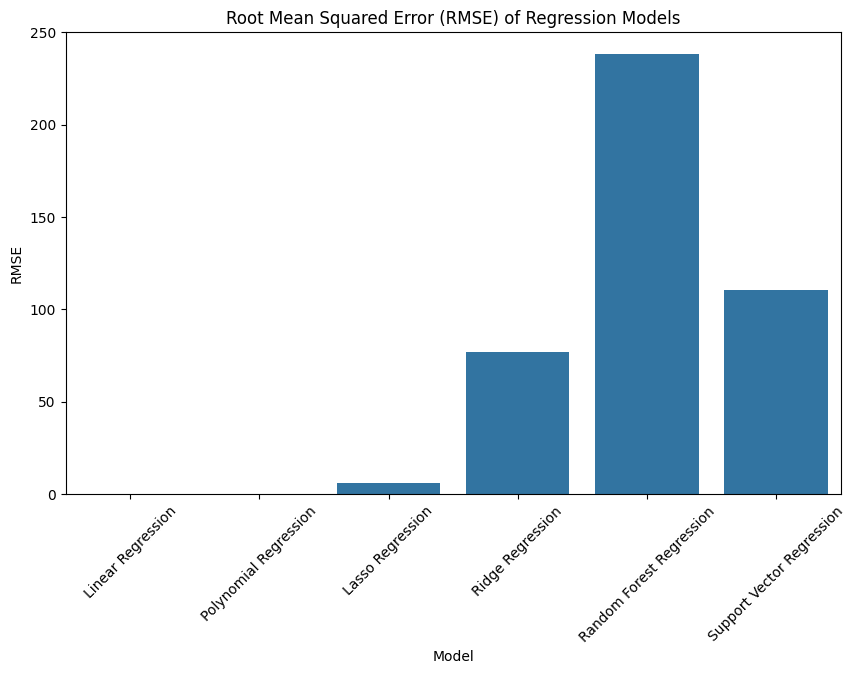

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Root Mean Squared Error (RMSE) of Regression Models')
plt.xticks(rotation=45)
plt.show()